In [2]:
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.models import Model, load_model, Sequential

#from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime


%matplotlib inline
%load_ext autoreload
%autoreload 1

#%aimport 

SEED=1
random.seed(SEED)
np.random.seed(SEED)
tf.set_random_seed(SEED)

K.clear_session()
#K.set_image_data_format('channels_last')
#K.set_learning_phase(1)



Using TensorFlow backend.


In [3]:
print(tf.__version__)

1.14.0


# Load Data

In [12]:
# load data
# split train test set
# del loaded data
# assert on expected shape
# assert x_train.shape == ()

#K.set_image_date_format('channels_last')

#mnist = tf.keras.datasets.mnist
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_val, x_test = np.split(x_test, 2)
#y_val, y_test = np.split(y_test, 2)

#x_train, x_val, x_test = x_train / 255.0, x_val/255.0, x_train/255.0
#print(x_train.shape)

num_classes = 10

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train_orig), (x_test_orig, y_test_orig) = cifar10.load_data()
x_val, x_test = np.split(x_test_orig, 2)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = utils.to_categorical(y_train_orig, num_classes)
y_test_1 = utils.to_categorical(y_test_orig, num_classes)

#y_val, y_test = np.split(y_test_1, 2)
del x_test_orig
del y_test_orig
del y_train_orig
del y_test_1

#x_train, x_val, x_test = x_train / 255.0, x_val/255.0, x_train/255.0

x_train shape: (50000, 32, 32, 3)
50000 train samples
5000 test samples


# Model

In [13]:
VERSION = datetime.now().strftime('%Y-%m-%dT%H:%M:%S')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(num_classes),
    tf.keras.layers.Activation('softmax')
])




#def classifer_cnn(input, name):
#    X = 
#    X = Conv2D()
#    return Model(input, X, name=name)
#input_shape =(28, 28, 3)

#model = tf.keras.models.Sequential([
#    tf.keras.layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
#                           activation='relu',
#                           input_shape=input_shape),
#    tf.keras.layers.Flatten(),
#    tf.keras.layers.Dense(128, activation='relu'),
#    tf.keras.layers.Dropout(0.2),
#    tf.keras.layers.Dense(10, activation='softmax')
#])

#model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
#                 activation='relu',
#                 input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#model.add(Conv2D(64, (5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Flatten())
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(num_classes, activation='softmax'))


!mkdir -p models
#%notebook -e models/{VERSION}.ipynb

#K.clear_session()
#K.set_session(tf.Session(config=))
#model = classifer_cnn(x_in, 'classifer_cnn')
#model.save(f'models/{VERSION}.architecture.h5')
#model.save('models/latest.architecture.h5')


# Train

In [14]:
initial_epoch = 0



Train on 50000 samples, validate on 5000 samples
Epoch 1/40
49920/50000 [============================>.] - ETA: 0s - loss: 3.1561 - acc: 0.2983
Epoch 00001: saving model to weights.01.h5
50000/50000 [==============================] - 64s 1ms/sample - loss: 3.1536 - acc: 0.2985 - val_loss: 1.5839 - val_acc: 0.4222
Epoch 2/40
49920/50000 [============================>.] - ETA: 0s - loss: 1.5069 - acc: 0.4529
Epoch 00002: saving model to weights.02.h5
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.5070 - acc: 0.4528 - val_loss: 1.3529 - val_acc: 0.5276
Epoch 3/40
49920/50000 [============================>.] - ETA: 0s - loss: 1.3347 - acc: 0.5247
Epoch 00003: saving model to weights.03.h5
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.3345 - acc: 0.5249 - val_loss: 1.2127 - val_acc: 0.5696
Epoch 4/40
49920/50000 [============================>.] - ETA: 0s - loss: 1.2157 - acc: 0.5676
Epoch 00004: saving model to weights.04.h5
50000/50000 [==

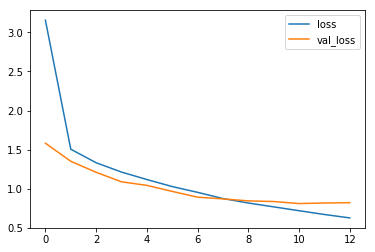

In [15]:
EPOCHS=40
#K.set_image_date_format('channels_last')

def scheduler(epoch):
  if epoch < 10:
    return 0.001
  else:
    return 0.001 * tf.math.exp(0.1 * (10 - epoch))


#callbacks
#tensorboard = Tensorboard(log_di='logs/' + VERSION)
#checkpoint_file_path = f'models/{VERSION}/{VERSION}.checkpoint.h5'
checkpoint_file_path = 'weights.{epoch:02d}-{val_loss:.2f}.h5'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_file_path, monitor='val_loss', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=2),
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                              patience=5, min_lr=0.001)
#learning_scheduler = LearningRateScheduler(scheduler)

#callbacks = [model_checkpoint, reduce_lr]
#callbacks = [model_checkpoint, reduce_lr, learning_scheduler]
#callbacks = [early_stopping, model_checkpoint]
#callbacks = [early_stopping]
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='weights.{epoch:02d}.h5', monitor='val_loss', verbose=1)]

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#train_history = model.fit(x=x_train, y=y_train, epochs=EPOCHS, callbacks=callbacks, batch_size=256, validation_data=(x_val, y_val))
train_history = model.fit(x=x_train, y=y_train, epochs=EPOCHS, callbacks=callbacks, batch_size=256, validation_data=(x_test, y_test))


#plotter.losses(history)
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.show()

#initial_epoch += EPOCHS
#model.save( f'models/{VERSION}.checkpoint.h5')

In [16]:

#plotter.losses(history)
initial_epoch += 13
model.save( f'models/{VERSION}.checkpoint.h5')

#initial_epoch += EPOCHS
#model.save( f'models/{VERSION}/{VERSION}.checkpoint.h5')


Input image shape: (1, 32, 32, 3)
[[2.40110811e-02 1.15661584e-01 1.49614459e-06 1.43740268e-03
  1.18076836e-03 1.46898476e-03 5.80465561e-03 3.66011263e-05
  6.50358890e-13 8.50397348e-01]]


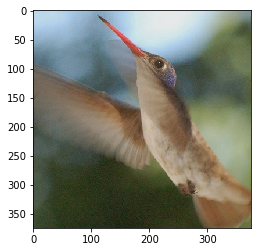

In [25]:
from matplotlib.pyplot import imread, imshow
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input



img_path = './images/BOLD5000_Stimuli/Scene_Stimuli/Presented_Stimuli/ImageNet/n01833805_1411.JPEG'
my_image = imread(img_path)
imshow(my_image)

img = image.load_img(img_path, target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
print(model.predict(x))


(32, 32, 3)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


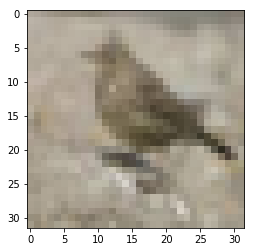

In [33]:

x_sample = x_train[120]
y_sample = y_train[120]
print(x_sample.shape)
imshow(x_sample)
print(y_sample)